<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Chile_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Archivo descargado de Our World in Data: https://ourworldindata.org/coronavirus-data#testing

In [0]:
tests = pd.read_csv('gdrive/My Drive/tests-vs-confirmed-cases-covid-19.csv')

In [4]:
tests.head()

,Entity,Code,Date,Total COVID-19 tests,Total confirmed cases of COVID-19 (cases)
0,Afghanistan,AFG,"Dec 31, 2019",NaN,0.0
1,Afghanistan,AFG,"Jan 1, 2020",NaN,0.0
2,Afghanistan,AFG,"Jan 2, 2020",NaN,0.0
3,Afghanistan,AFG,"Jan 3, 2020",NaN,0.0
4,Afghanistan,AFG,"Jan 4, 2020",NaN,0.0


In [0]:
list_countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', \
                  'Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela', \
                  'France', 'Italy', 'Japan', 'Spain', 'South Korea', 'United Kingdom', 'United States']

In [0]:
n_known_cases = pd.Series()
for country in list_countries:
  n_known_cases[country] = tests[tests['Entity'] == country]['Total confirmed cases of COVID-19 (cases)'].iloc[-1]

In [0]:
n_known_cases['Chile'] = 1610.0

In [8]:
n_known_cases

Argentina           502.0
Bolivia              39.0
Brazil             2433.0
Chile              1610.0
Colombia            470.0
Ecuador            1211.0
Paraguay             37.0
Peru                558.0
Uruguay             217.0
Venezuela           106.0
France            25233.0
Italy             74386.0
Japan              1268.0
Spain             47610.0
South Korea        9241.0
United Kingdom     9529.0
United States     69194.0
dtype: float64

In [0]:
n_tests = pd.Series()
for country in list_countries:
  aux = tests[tests['Entity'] == country]['Total COVID-19 tests']
  if aux.notnull().sum() != 0:
    n_tests[country] = aux[aux.notnull()].values[0]
  else:
    n_tests[country] = aux.iloc[0]

In [0]:
n_tests['Chile'] = 23105.0

In [14]:
n_tests

Argentina              NaN
Bolivia                NaN
Brazil              2927.0
Chile              23105.0
Colombia            4103.0
Ecuador                NaN
Paraguay               NaN
Peru                   NaN
Uruguay                NaN
Venezuela              NaN
France             36747.0
Italy             206886.0
Japan              14901.0
Spain              30000.0
South Korea       316664.0
United Kingdom     64621.0
United States     103945.0
dtype: float64

In [0]:
data = {
    'Country': list_countries,
    'Number of confirmed cases': n_known_cases,
    'Number of tests': n_tests
}

In [16]:
df = pd.DataFrame(data).set_index('Country')
df.head()

,Number of confirmed cases,Number of tests
Country,,
Argentina,502.0,NaN
Bolivia,39.0,NaN
Brazil,2433.0,2927.0
Chile,1610.0,23105.0
Colombia,470.0,4103.0


In [0]:
df = df.dropna()

In [18]:
df

,Number of confirmed cases,Number of tests
Country,,
Brazil,2433.0,2927.0
Chile,1610.0,23105.0
Colombia,470.0,4103.0
France,25233.0,36747.0
Italy,74386.0,206886.0
Japan,1268.0,14901.0
Spain,47610.0,30000.0
South Korea,9241.0,316664.0
United Kingdom,9529.0,64621.0


In [0]:
population = [212, 19, 50, 65, 60, 126, 46, 51, 67, 331]

In [20]:
(df['Number of tests']/population).sort_values(ascending=False)

Country
South Korea       6209.098039
Italy             3448.100000
Chile             1216.052632
United Kingdom     964.492537
Spain              652.173913
France             565.338462
United States      314.033233
Japan              118.261905
Colombia            82.060000
Brazil              13.806604
Name: Number of tests, dtype: float64

In [0]:
df_aux = df['Number of tests'].sort_values(ascending=True)

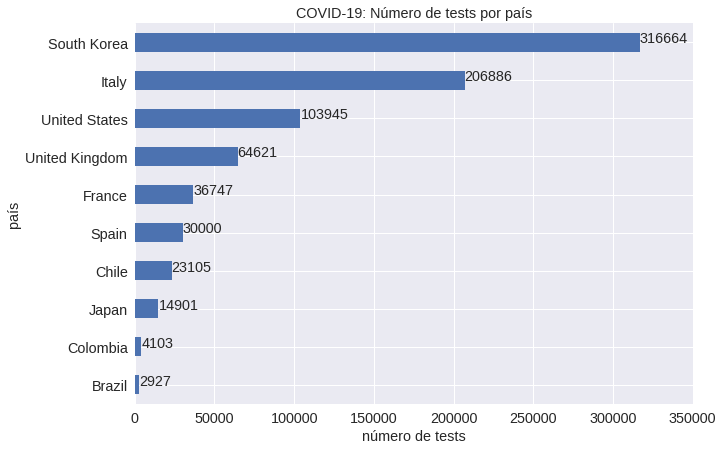

In [22]:
fig, ax = plt.subplots(figsize=(10,7))
ax = df_aux.plot.barh(x=df_aux.keys, y=df_aux.values, fontsize='x-large')
for i, txt in enumerate(df.index):
  ax.annotate(int(df_aux[i]), (df_aux[i],i), fontsize='x-large')
plt.title('COVID-19: Número de tests por país', fontsize='x-large')
plt.ylabel('país', fontsize='x-large')
plt.xlabel('número de tests', fontsize='x-large')
plt.xlim(0,350000)
plt.show()

In [0]:
df_aux = (df['Number of tests']/population).sort_values(ascending=True)

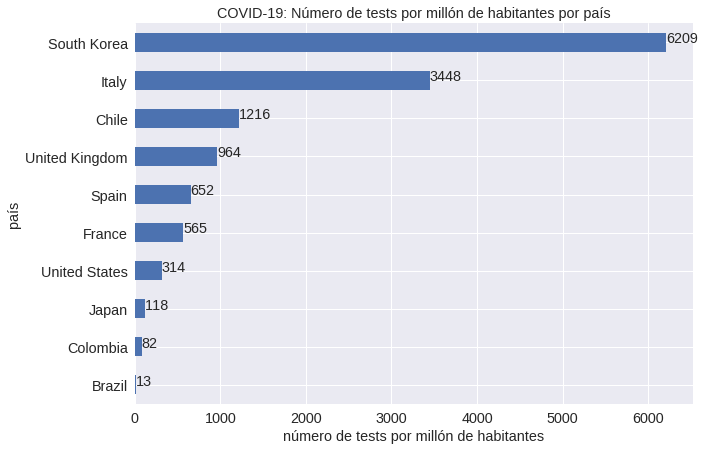

In [24]:
fig, ax = plt.subplots(figsize=(10,7))
ax = df_aux.plot.barh(x=df['Number of tests'].keys, y=df['Number of tests'].values, fontsize='x-large')
for i, txt in enumerate(df.index):
  ax.annotate(int(df_aux[i]), (df_aux[i],i), fontsize='x-large')
plt.title('COVID-19: Número de tests por millón de habitantes por país', fontsize='x-large')
plt.ylabel('país', fontsize='x-large')
plt.xlabel('número de tests por millón de habitantes', fontsize='x-large')
plt.show()

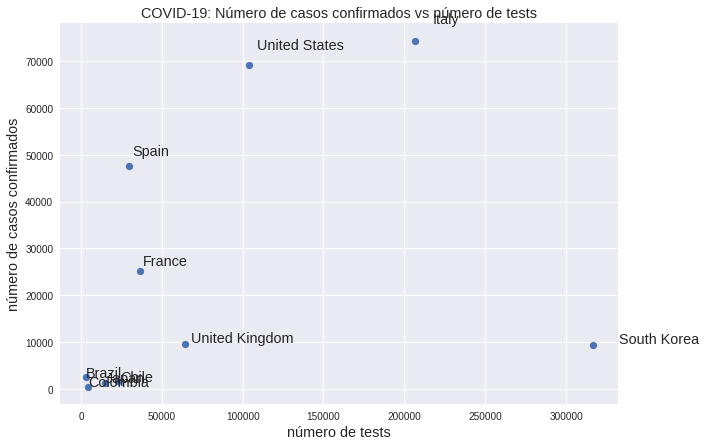

In [25]:
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(df['Number of tests'], df['Number of confirmed cases'])
for i, txt in enumerate(df.index):
    ax.annotate(df.index[i], ((df['Number of tests'].iloc[i])*1.05, (df['Number of confirmed cases'].iloc[i])*1.05), fontsize='x-large')

plt.title('COVID-19: Número de casos confirmados vs número de tests', fontsize='x-large')
plt.ylabel('número de casos confirmados', fontsize='x-large')
plt.xlabel('número de tests', fontsize='x-large')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

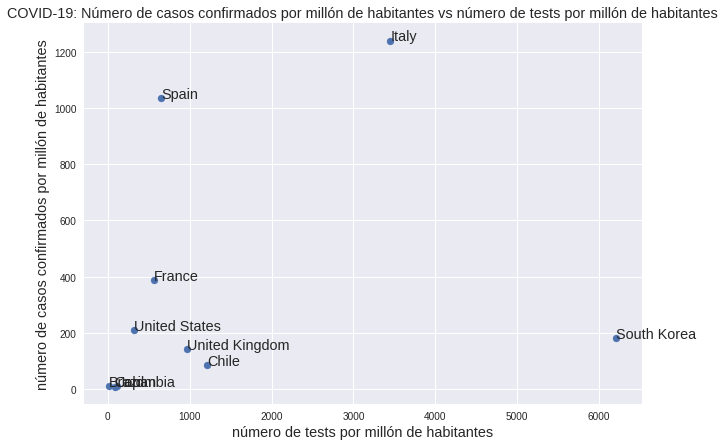

In [26]:
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(df['Number of tests']/population, df['Number of confirmed cases']/population)
for i, txt in enumerate(df.index):
  ax.annotate(df.index[i], ((df['Number of tests']/population).iloc[i],(df['Number of confirmed cases']/population).iloc[i]), fontsize='x-large')

plt.title('COVID-19: Número de casos confirmados por millón de habitantes vs número de tests por millón de habitantes', fontsize='x-large')
plt.xlabel('número de tests por millón de habitantes', fontsize='x-large')
plt.ylabel('número de casos confirmados por millón de habitantes', fontsize='x-large')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

In [0]:
df['Positive percentage'] = df['Number of confirmed cases']/df['Number of tests']

In [28]:
df.sort_values(ascending=False, by='Positive percentage')

,Number of confirmed cases,Number of tests,Positive percentage
Country,,,
Spain,47610.0,30000.0,1.587000
Brazil,2433.0,2927.0,0.831227
France,25233.0,36747.0,0.686668
United States,69194.0,103945.0,0.665679
Italy,74386.0,206886.0,0.359551
United Kingdom,9529.0,64621.0,0.147460
Colombia,470.0,4103.0,0.114550
Japan,1268.0,14901.0,0.085095
Chile,1610.0,23105.0,0.069682


In [29]:
1610/23105

0.06968188703743779